In [119]:
import gensim
from data_helper import *
from topic_analysis import *
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 10)

Populating the interactive namespace from numpy and matplotlib


/home/yevhen/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['save']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [120]:
clinical = load_dump("idump_new")
control = load_dump("hdump_new")
# control = load_dump("hdump_new")
all_data = control+clinical

In [121]:
len(clinical)

6176

In [122]:
len(control)

10798

In [123]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

In [124]:
tok_all = [word_tokenize(doc) for doc in all_data]
tok_ill = [word_tokenize(doc) for doc in clinical]
tok_healthy = [word_tokenize(doc) for doc in control]

In [125]:
dictionary = Dictionary(tok_all)

In [126]:
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.4)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 84328
Number of unique words after removing rare and common words: 17684


In [127]:
corpus = [dictionary.doc2bow(doc) for doc in tok_all]

In [128]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 17684
Number of documents: 16974


In [129]:
num_topics = 40
passes = 100

In [130]:
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

In [131]:
lda = LdaMulticore(corpus, id2word=id2word, num_topics=num_topics, passes=passes, minimum_probability=0.0)
# lda = LdaMulticore.load("lda_model")

In [132]:
ill_corpus = [dictionary.doc2bow(doc) for doc in tok_ill]
healthy_corpus = [dictionary.doc2bow(doc) for doc in tok_healthy]

In [133]:
#lda.show_topics(num_topics=5, num_words=20, formatted=True)

In [134]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [135]:
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(lda, topic_number=i, topn=20, output=True)
    topic_summaries.append(tmp)

[print(" ".join(topic)) for topic in topic_summaries]


term                 frequency

Topic 0 |---------------------

write                0.016
post                 0.013
blog                 0.012
learn                0.012
really               0.011
unschooling          0.010
read                 0.010
something            0.008
share                0.008
start                0.007
new                  0.007
lot                  0.007
look                 0.006
might                0.006
myself               0.005
best                 0.004
still                0.004
different            0.004
important            0.004
idea                 0.004
Topic 1 |---------------------

brain                0.017
study                0.015
level                0.010
increase             0.009
disease              0.007
risk                 0.006
cause                0.006
stress               0.006
autism               0.006
serotonin            0.005
seem                 0.005
human                0.005
show                 0.005
system       

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [136]:
def doc2topic_matrix(model, corpus):
    matrix = np.empty(shape=(len(corpus), num_topics))
    for i in range(len(corpus)):
        for j in range(num_topics):
            matrix[i][j] = model[corpus][i][j][1]
    return matrix


In [137]:
doc2topic_ctrl = doc2topic_matrix(lda, healthy_corpus)
doc2topic_clin = doc2topic_matrix(lda, ill_corpus)
doc2topic_all = doc2topic_matrix(lda, corpus)

In [138]:
# topics = ["education", "relationships", "school", "mental health", "feelings", "unschooling", "time periods", "reflexions", "literature", "treatment"]
topics = np.arange(0, num_topics)
# topics

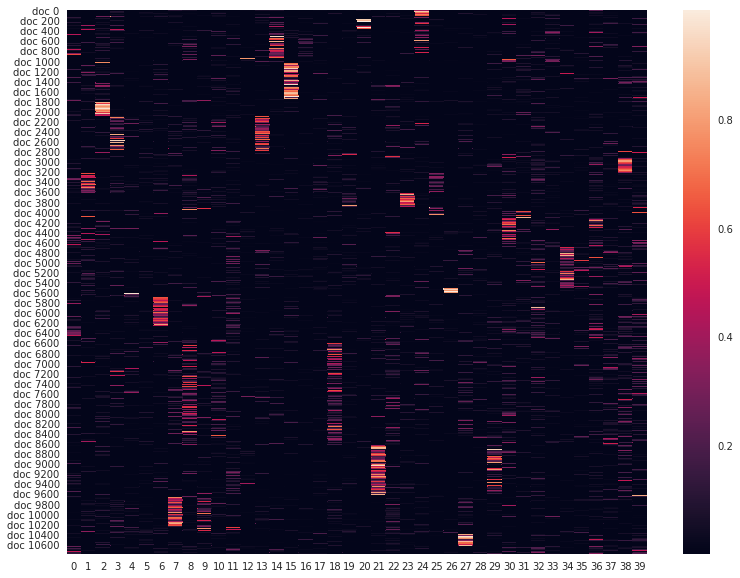

In [139]:
plot_heatmap(doc2topic_ctrl, topics)

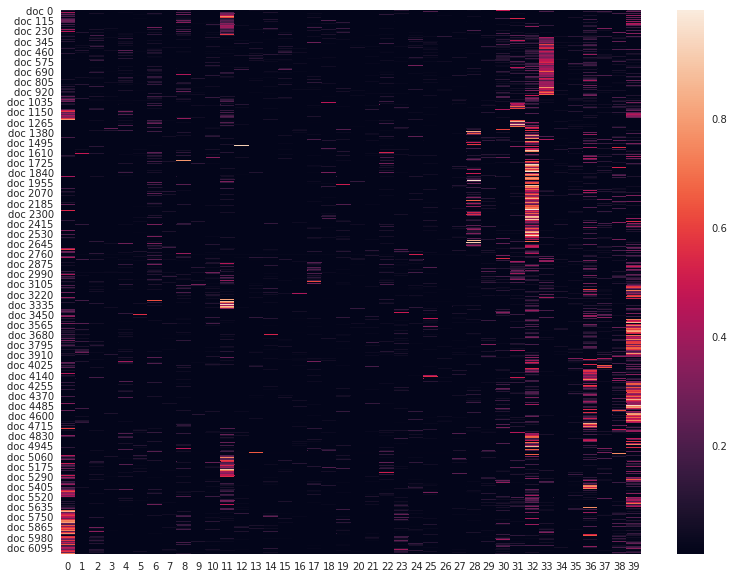

In [140]:
plot_heatmap(doc2topic_clin, topics)

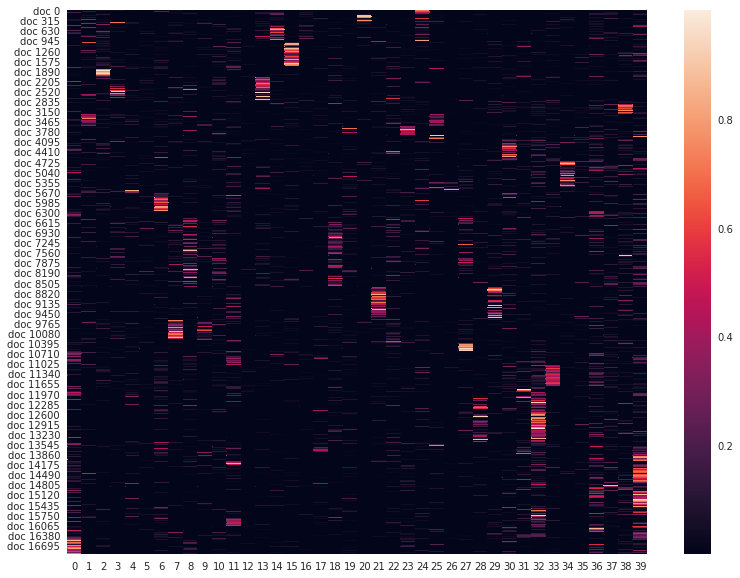

In [141]:
plot_heatmap(doc2topic_all, topics)